# 第四章 统计分析

在明天的`Statistical studies`课程中，会对CMS实验的统计分析及其工具作一个更全面、更深入的讲解。这里我们出于完善典型分析主要步骤的原因，使用相应工具对我们得到的实验数据（`Data`），预测值（`Prediction`:包括**Monte Carlo**模拟和**Data-Driven**估计），进行统计学解释。

## （一）泊松分布
![cabinetry.png](./figs/poisson_wiki.png) 

其中$\lambda$为期望值，$X$为随机变量。

假设我们有一个分析，计算质子--质子对撞中产生的事例数量，这时候：
1. 观测数据`Data`只是观测到的事例数$N$
2. 我们能够通过理论模型预测事例数的期望值$n_{exp}$: 通常情况下，我们的信号过程有一个参考截面，我们的本底过程有已知的截面--那么我们的POI （Parameter of Interest, 感兴趣的参数）可能是信号截面与参考截面的比值，我们通常称为信号强度，记为 $\mu$，
   
   <img src="./figs/expected_count.png" width = "60%" />

3. 泊松概率就可以写成：
   
   $p(N|n_{exp}) = \frac{n_{exp}^{N}e^{-n_{exp}}}{N!}$

4. 计算$n_{exp}$时，我们提到了POI，除此之外，还有一些参数，会对我们的估计造成影响，NPs(Nuisance paramters：滋扰参数？)。2中表达式的任意一项都可以有相关的不确定度。例如，积分亮度$L$测量可能有2.5%的不确定性。观察到的事件数量可以增加2.5%（乘以1.025）或减少2.5%（除以 1.025)。此时，
   1.  $L^{int}\rightarrow L^{int}(1 + 0.025)^{\theta}$
   2.  当 $\theta$=0, $L^{int}$ 不会改变. 当 $\theta = \pm 1$ 我们会有 +/- 1 $\sigma$ 的不确定度。通常对此我们添加一项高斯约束（gaussian constraint），
   
         $\pi (\theta_{0}|\theta) = \pi (0|\theta) = e^{-\frac{1}{2} \theta^{2}}$， 滋扰参数为**log-normally**分布

## （二）似然函数 （likelihood function）
（又从维基百科上搬运东西过来了😁）

在数理统计学中，似然函数（英语：likelihood function）是一种关于统计模型中的参数的函数，表示模型参数中的似然性（英语：likelihood）。似然函数在统计推断中有重大作用，如在最大似然估计和费雪信息之中的应用等等。文字意义上，“似然性”与“或然性”或“概率”意思相近，都是指某种事件发生的可能性，但是在统计学中，<span style="background-color:yellow;color:black">“似然性”和“概率”（或然性）有明确的区分：概率，用于在已知一些参数的情况下，预测接下来在观测上所得到的结果；似然性，则是用于在已知某些观测所得到的结果时，对有关事物之性质的参数进行估值，也就是说已观察到某事件后，对相关参数进行猜测。</span>

在这种意义上，似然函数可以理解为条件概率的逆反。在已知某个参数B时，事件A会发生的概率写作：

$P(A|B)=\frac{P(A,B)}{P(B)}$

利用[贝叶斯定理](https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86)，

$P(B|A)=\frac{P(A|B) P(B)}{P(A)}$

因此，我们可以反过来构造表示似然性的方法：已知有事件A发生，运用似然函数$\mathbb {L} (B\mid A)$，我们估计或猜测参数B的不同值的可能性。形式上，似然函数也是一种条件概率函数，但我们关注的变量改变了：

$ b\mapsto P(A\mid B=b)$

注意到这里并不要求似然函数满足归一性：$ \sum _{b\in {\mathcal {B}}}P(A\mid B=b)=1$。一个似然函数乘以一个正的常数之后仍然是似然函数。对所有$\alpha >0$，都可以有似然函数：

$\mathscr{L}(b\mid A)=\alpha \;P(A\mid B=b)$

考虑（一）中的例子，其**似然函数**为：

$\mathscr{L}(\mu,\theta)=\frac{n_{exp}^{N}e^{-n_{exp}}}{N!}e^{-\frac{1}{2}\theta^2}$, 其中

$n_{exp}=\mu \sigma_{sig} \epsilon_{sig} A_{sig} L^{int}1.025^{\theta} +  \sigma_{bkg} \epsilon_{bkg} A_{bkg} L^{int}1.025^{\theta}$

但是我们刚刚得到的`Data`和`Predcition`的对比图，不只是一个简单的计数，而是包含多个bin，

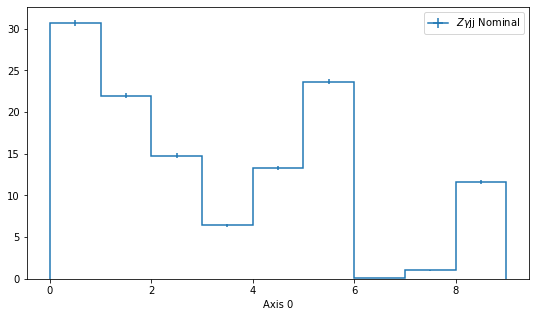

In [1]:
import uproot as up
import hist as bh_hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))

hists = up.open("./inputs/histograms.root")

htmp1 = bh_hist.Hist(hists["SR"]["Signal"]["Nominal"].to_boost())
htmp1.plot(label="$Z\gamma$jj Nominal")

ax.legend(loc='upper right')

plt.show()

这时候对应的似然函数如何表示呢？
当然，这也可以扩展到包含多个分bin的频数图（使用泊松概率的乘积）和/或多个NPs,

<img src="./figs/product_pois.png" width = "60%" />


### (1) 极大似然估计

<span style="background-color:yellow;color:black">对同一个似然函数，其所代表的模型中，某项参数值具有多种可能，但如果存在一个参数值，使得概似函数值达到最大的话，那么这个值就是该项参数最为“合理”的参数值。</span>

最大似然估计是似然函数最初也是最自然的应用。似然函数取得最大值表示相应的参数能够使得统计模型最为合理。从这样一个想法出发，最大似然估计的做法是：首先选取似然函数（一般是概率密度函数或概率质量函数），整理之后求最大值点。实际应用中一般会取似然函数的对数作为求最大值的函数，这样求出的最大值点和直接求最大值点得到的结果是相同的。似然函数的最大值点不一定唯一，也不一定存在。与矩法估计比较，最大似然估计的精确度较高，信息损失较少，但计算量较大。

#### Profile likelihood

大家有兴趣可以刷刷知乎 [profile likelihood是什么?和likelihood有什么联系?](https://www.zhihu.com/question/310585422) 👍

大概的意思是，当似然函数具有多个参数时，只关注其中一部分参数（POIs），而将其他参数视为常数（NPs），此时似然函数就被称为profile likelihood。

比如下面的例子，二维的似然函数，包含一个POI（$\mu$）和一个NP（$\theta$）的模型，

<img src="./figs/2d_likelihood.png" width = "80%" />

我们希望求得 (profiled) likelihood的最大值--为了避免处理特别大的或特别小的值，一般转而去求 **N**egtive **L**og of the **L**ikelihood (**NLL**) 的最小值。

<img src="./figs/NLL.png" width = "40%" />

**NLL**曲线的最小值记为， $\hat{\mu}$，由于我们并不关心最小值处的数值，一般会减去最小值处的数值，得到的曲线为**ΔNLL**，

$-\Delta ln \mathscr{L} = - ln\mathscr{L}(\mu,\hat{\theta}(\mu))-(-ln\mathscr{L}(\hat{\mu},\hat{\theta}(\mu))) = -ln \frac{\mathscr{L}(\mu,\hat{\theta}(\mu))}{\mathscr{L}(\hat{\mu},\hat{\theta}(\mu))}$

<img src="./figs/delta_NLL.png" width = "40%" />

根据**Wilks’ theorem**，在大样本量的限制下，2倍 **-ΔNLL** 为具有N个自由度的$\chi^{2}$，其中N是似然比的分子和分母之间自由参数数量的差异（即在我们的例子中为1）。

因此，我们从该区域得到68%的置信区间，

$-\Delta ln \mathscr{L} (\mu) < 0.5$

## （三）动手实践（hands-on）

高能物理实验使用的统计工具一直在不断发展，

基于`ROOT`，我们有 `RooFit` 工具包，

<img src="./figs/RooFit.png" width = "80%" />

`CMS`合作组，基于`RooFit`/`RooStats`内部广泛使用的许多不同的统计技术提供一个命令行接口，[**CMS combine tool**](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/)。这是`CMS`实验统计分析的标准工具，明天的`Statistical studies`课程，大家可以了解更多，

<img src="./figs/CMS_combine.png" width = "80%" />

随着Python编程语言的流行，很多基于Python的高能物理分析软件也在不断的更新升级中，具体可以参看[Scikit-HEP](https://scikit-hep.org/), 其中就有统计分析相关的工具[pyhf](https://github.com/scikit-hep/pyhf)和[cabinetry](https://github.com/scikit-hep/cabinetry)。

<img src="./figs/Cabinetry.png" width = "80%" />

本节使用的软件包是 [`cabinetry`](https://github.com/scikit-hep/cabinetry)。

![cabinetry.png](./figs/cabinetry_logo_small.png) 

`cabinetry` is a Python library for building and steering <span style="background-color:yellow;color:black">binned template fits</span>
.
It is written with applications in High Energy Physics in mind.
`cabinetry` interfaces many other powerful libraries to make it easy for an analyzer to run their statistical inference pipeline.
Statistical models in [HistFactory](https://cds.cern.ch/record/1456844) format can be built by `cabinetry` from instructions in a declarative configuration.
`cabinetry` makes heavy use of [`pyhf`](https://pyhf.readthedocs.io/) for statistical inference, and provides additional utilities to help study and disseminate fit results.
This includes commonly used visualizations.
Due to its modular approach, analyzers are free to use all of `cabinetry`'s functionality or only some pieces.
`cabinetry` can be used for inference and visualization with any `pyhf`-compatible model, whether it was built with `cabinetry` or not.

1. 我们先导入`cabinetry`，set_logging函数只是设置了一个默认的信息输出等级。

In [2]:
import cabinetry
cabinetry.set_logging()

import pyhf


2. 配置文件`config_histograms.yml`是设置`cabinetry`的关键

In [20]:
config = cabinetry.configuration.load("config_histograms.yml")# create template histograms

INFO - cabinetry.configuration - opening config file config_histograms.yml


In [21]:
config["General"]

{'Measurement': 'zajj',
 'POI': 'Signal_norm',
 'HistogramFolder': 'histograms/',
 'InputPath': 'inputs/histograms.root:{RegionPath}/{SamplePath}/{VariationPath}',
 'VariationPath': 'Nominal'}

In [22]:
config["Regions"]

[{'Name': 'Signal_region', 'RegionPath': 'SR'},
 {'Name': 'Control_region', 'RegionPath': 'CR'}]

In [23]:
config["Samples"]

[{'Name': 'Data', 'SamplePath': 'Data', 'Data': True},
 {'Name': 'Signal', 'SamplePath': 'Signal'},
 {'Name': 'ZGammaQCD', 'SamplePath': 'ZGammaQCD'},
 {'Name': 'FakePhoton', 'SamplePath': 'FakePhoton'},
 {'Name': 'Others', 'SamplePath': 'Others'}]

In [24]:
config["NormFactors"]

[{'Name': 'Signal_norm', 'Samples': 'Signal', 'Nominal': 1, 'Bounds': [0, 10]}]

In [25]:
config["Systematics"]

[{'Name': 'LumiSyst',
  'Up': {'Normalization': 0.02},
  'Down': {'Normalization': -0.02},
  'Samples': ['Signal', 'ZGammaQCD', 'Others'],
  'Type': 'Normalization'},
 {'Name': 'SignalPDF',
  'Up': {'Normalization': 0.02},
  'Down': {'Normalization': -0.02},
  'Samples': 'Signal',
  'Type': 'Normalization'},
 {'Name': 'SignalScale',
  'Up': {'Normalization': 0.1},
  'Down': {'Normalization': -0.1},
  'Samples': 'Signal',
  'Type': 'Normalization'},
 {'Name': 'FakeSyst',
  'Up': {'VariationPath': 'FakeSyst_up'},
  'Down': {'VariationPath': 'FakeSyst_down'},
  'Samples': 'FakePhoton',
  'Type': 'NormPlusShape'},
 {'Name': 'JEC',
  'Up': {'VariationPath': 'JEC_up'},
  'Down': {'VariationPath': 'JEC_down'},
  'Samples': ['Signal', 'ZGammaQCD', 'Others'],
  'Type': 'NormPlusShape'},
 {'Name': 'JER',
  'Up': {'VariationPath': 'JER_up'},
  'Down': {'VariationPath': 'JER_down'},
  'Samples': ['Signal', 'ZGammaQCD', 'Others'],
  'Type': 'NormPlusShape'}]

3. 同时我们也将之前存储的模板（**template**）直方图读取进来，然后建立相应的`workspace`

In [26]:
# collects all provided histograms (storing them in the format used internally by cabinetry for further processing)
cabinetry.templates.collect(config, method="uproot")
# build a workspace
ws = cabinetry.workspace.build(config)

DEBUG - cabinetry.route -   in region Signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Data.npz
DEBUG - cabinetry.route -     reading sample Signal
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal.npz
DEBUG - cabinetry.route -       variation JEC Up
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JEC_Up.npz
DEBUG - cabinetry.route -       variation JEC Down
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JEC_Down.npz
DEBUG - cabinetry.route -       variation JER Up
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JER_Up.npz
DEBUG - cabinetry.route -       variation JER Down
DEBUG - cabinetry.histo - saving histogram to histograms/Signal_region_Signal_JER_Down.npz
DEBUG - cabinetry.route 

DEBUG - cabinetry.workspace - adding OverallSys LumiSyst to sample ZGammaQCD in region Signal_region
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JEC to sample ZGammaQCD in region Signal_region
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_JEC_Up_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_JEC_Down_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JER to sample ZGammaQCD in region Signal_region
WARNING - cabinetry.histo - the modified histogram histograms/Signal_region_ZGammaQCD_JER_Up_modified.npz does

WARNING - cabinetry.histo - the modified histogram histograms/Control_region_FakePhoton_FakeSyst_Down_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
DEBUG - cabinetry.workspace - adding OverallSys LumiSyst to sample Others in region Control_region
DEBUG - cabinetry.workspace - adding OverallSys and HistoSys JEC to sample Others in region Control_region
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_JEC_Up_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modified histogram histograms/Control_region_Others_modified.npz does not exist
WARNING - cabinetry.histo - loading the un-modified histogram instead!
WARNING - cabinetry.histo - the modif

4. 建立了`workspace`后，我们可以进行极大似然拟合。拟合模型（概率密度函数Probability Density Function, **PDF**）和数据`Data`（都是从`workspace`对象中获得。拟合参数的结果将被报告。我们用到的cabinetry.fit.fit来进行拟合。

In [27]:
# run a fit
model, data = cabinetry.model_utils.model_and_data(ws)
fit_results = cabinetry.fit.fit(model, data)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier staterror_Signal_region (9 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Signal_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier LumiSyst (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SignalPDF (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SignalScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JEC (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JER (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier FakeSyst (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_Control_region (5 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - MINUIT status:
┌─────────────────────────────────────────────────────────────────────────┐
│                             

我们可以将拟合结果可视化。下面是`pull`的情况

DEBUG - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


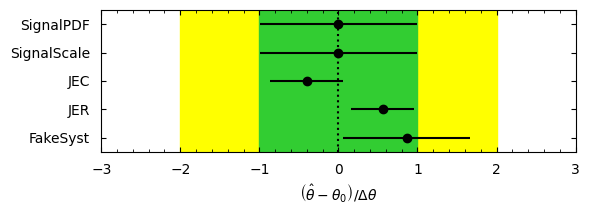

In [14]:
cabinetry.visualize.pulls(fit_results, exclude=["Signal_norm"])
# cabinetry.visualize.pulls(fit_results)

5. 我们先来求一下之前讲到的**ΔNLL**，就是对我们的POI ($\mu$)进行一个扫描，在配置文件中，你可以看到这一行`POI: "Signal_norm"`，所以我们这里要扫描的参数是为**Signal_norm**，这里我们调用cabinetry.fit.scan函数。

In [15]:
scan_results = cabinetry.fit.scan(model, data, "Signal_norm")

INFO - cabinetry.fit - MINUIT status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.93                      │             Nfcn = 1622              │
│ EDM = 0.000162 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 50.933527 at b

DEBUG - cabinetry.fit - -2 log(L) = 51.080206 at best-fit point
DEBUG - cabinetry.fit - performing fit with Signal_norm = 1.811
INFO - cabinetry.fit - MINUIT status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 51.49                      │             Nfcn = 1060              │
│ EDM = 7.37e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced 

DEBUG - cabinetry.visualize.utils - saving figure as figures/scan_Signal_norm.pdf


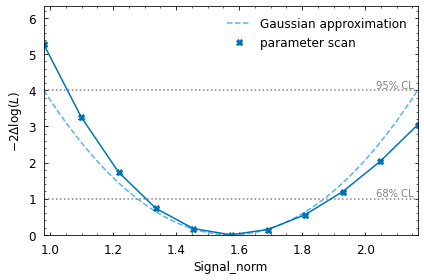

In [16]:
cabinetry.visualize.scan(scan_results)

6. 拟合后的结果，会给出POI和NPs的最佳拟合值，对于 POI（$\mu$），即配置文件中的`Signal_norm`，以及其他NPs也都会有改变，考虑拟合后的各种参数，作用于`Data`和`Prediction`，得到的图，我们叫做post-fit plots，对应的没有考虑拟合结果的老图就是pre-fit plots，我们先看一下pre-fit plots：

DEBUG - cabinetry.model_utils - total stdev is [[106, 72.9, 56.6, 32.2, 28.1], ... 5.11, 2.74, 30.6, 16.4, 5.28, 2.2, 8.01, 14]]
DEBUG - cabinetry.model_utils - total stdev per channel is [279, 98.9]
DEBUG - cabinetry.visualize.utils - saving figure as figures/Control_region_prefit.pdf
DEBUG - cabinetry.visualize.utils - saving figure as figures/Signal_region_prefit.pdf


[{'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Control_region'},
 {'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Signal_region'}]

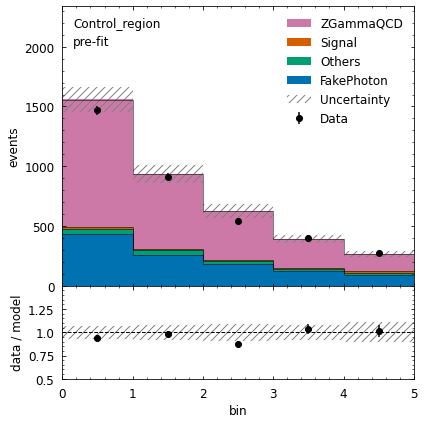

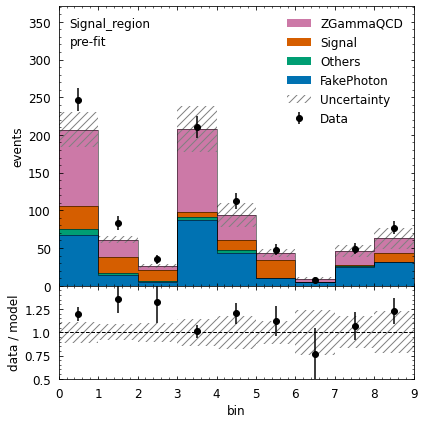

In [17]:
# visualize the pre-fit model prediction and data
model_pred = cabinetry.model_utils.prediction(model)
cabinetry.visualize.data_mc(model_pred, data, config=config)

接下来就是post-fit plots了，

DEBUG - cabinetry.model_utils - total stdev is [[34.8, 22.8, 17.2, 14.3, 10.4], ... 5.37, 3.54, 9.71, 6.43, 5.12, 1.5, 3.98, 5.38]]
DEBUG - cabinetry.model_utils - total stdev per channel is [63.1, 26.7]
DEBUG - cabinetry.visualize.utils - saving figure as figures/Control_region_postfit.pdf
DEBUG - cabinetry.visualize.utils - saving figure as figures/Signal_region_postfit.pdf


[{'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Control_region'},
 {'figure': <Figure size 432x432 with 2 Axes>, 'region': 'Signal_region'}]

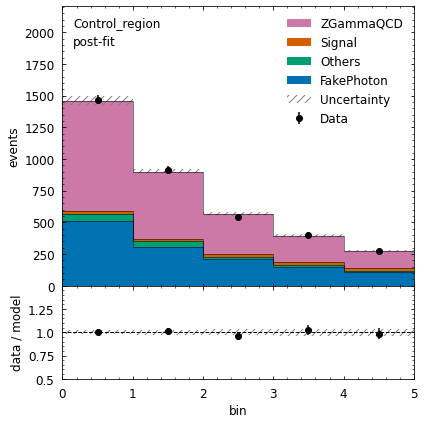

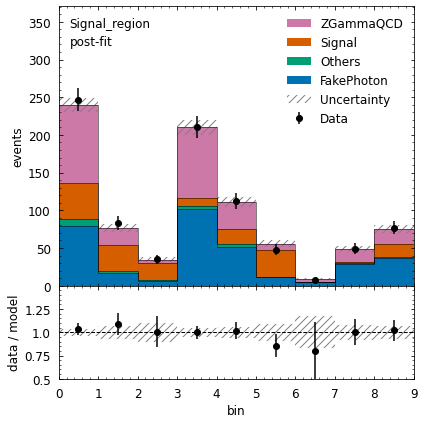

In [18]:
# visualize the post-fit model prediction and data
model_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
cabinetry.visualize.data_mc(model_postfit, data, config=config)

（四）似然比检验 （hands-on）

似然比检验是利用似然函数来检测某个假设（或限制）是否有效的一种检验。一般情况下，要检测某个附加的参数限制是否是正确的，可以将加入附加限制条件的较复杂模型的似然函数最大值与之前的较简单模型的似然函数最大值进行比较。如果参数限制是正确的，那么加入这样一个参数应当不会造成似然函数最大值的大幅变动。一般使用两者的比例来进行比较，这个比值是卡方($\chi ^2$)分布。

<img src="./figs/significances.png" width = "80%" />

计算信号显著度，我们调用到的函数是`cabinetry.fit.significance`

In [28]:
significance_results = cabinetry.fit.significance(model, data)

INFO - cabinetry.fit - calculating discovery significance
INFO - cabinetry.fit - observed p-value: 5.097e-15
INFO - cabinetry.fit - observed significance: 7.737
INFO - cabinetry.fit - expected p-value: 1.310e-09
INFO - cabinetry.fit - expected significance: 5.954


问题：
1. 在我们的假设检验中，零假设（null hypothesis）指的是什么？
2. 如果积分亮度的不确定度为2.0%，观测显著度（significance）会改变为多少？（截断到小数点后3位）
3. 根据下图，下列选项中哪两个bin对提高信号显著度作用最大？（bin的索引值从1开始）
   
   <img src="./figs/prefit.png" width = "40%" />

>参考资料：
> - https://indico.cern.ch/event/117033/contributions/1327652/attachments/55755/80228/Cranmer_L1.pdf
> - https://indico.cern.ch/event/976099/contributions/4138517/attachments/2161767/3647843/Likelihoods_handsonintro.pdf
> - https://indico.cern.ch/event/747340/contributions/3198621/attachments/1744332/2823479/Stats_Intro.pdf
> - https://github.com/cabinetry/cabinetry-tutorials
> - **专业文档** 👍 https://cds.cern.ch/record/1379837/files/NOTE2011_005.pdf